-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

In [0]:
file_path = f"dbfs:/FileStore/CAR_DETAILS_FROM_CAR_DEKHO-1.csv"
car_df = (spark.read.option('header','true').option('inferschema','true').format("csv").load(file_path))
train_df, test_df = car_df.randomSplit([.8, .2], seed=42)

In [0]:
car_df.write.format('delta').save("dbfs:/FileStore/Vanquishers/")

In [0]:
train_df.display()

name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
Audi A4 2.0 TDI,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner
Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner


In [0]:
train_df.dtypes

Out[4]: [('name', 'string'),
 ('year', 'int'),
 ('selling_price', 'int'),
 ('km_driven', 'int'),
 ('fuel', 'string'),
 ('seller_type', 'string'),
 ('transmission', 'string'),
 ('owner', 'string')]

In [0]:
from databricks import automl

summary = automl.regress(train_df, target_col="selling_price", primary_metric="rmse")

2022/08/10 07:04:22 INFO databricks.automl.supervised_learner: AutoML run for regression started with run_id: 52cd8022-1dfb-4c19-be55-626c66a04f28
2022/08/10 07:04:22 INFO databricks.automl.base_learner: AutoML run for regression will record all trials to MlFlow experiment with id: 2104016397946398
2022/08/10 07:04:47 INFO databricks.automl.supervised_learner: Data exploration complete. Notebook can be found at: https://enb-accenture.cloud.databricks.com/?o=4064976644554337https://enb-accenture.cloud.databricks.com/?o=4064976644554337#notebook/2104016397946399

**********************************************************************************************************
Trials for training a model on the dataset have been kicked off. The model will be optimized
for the root mean squared error metric (tracked as val_rmse in MLflow experiments).

You can track the completed trials in the MLflow experiment here:
https://enb-accenture.cloud.databricks.com/?o=4064976644554337#mlflow/experiments/2104016397946398/s?orderByKey=metrics.%60val_rmse%60&orderByAsc=true

Notebooks that generate the trials can be edited to tweak the setup, add hyperparameters and re-run the trials.
All re-run notebooks will log the trials under the same experiment.
Generated notebooks contain instructions to load models from your favorite trials.
**********************************************************************************************************

 0%| | 0/200 [00:00<?, ?trial/s, best loss=?] Deprecated in 3.1, Use pyspark.InheritableThread with the pinned thread mode enabled.

 0%| | 0/200 [00:00<?, ?trial/s, best loss=?] 1%| | 2/200 [00:36<1:00:43, 18.40s/trial, best loss: 336011.1285624959] 2%|▏ | 3/200 [01:23<1:39:45, 30.38s/trial, best loss: 336011.1285624959] 2%|▏ | 4/200 [01:48<1:32:43, 28.38s/trial, best loss: 336011.1285624959] 2%|▎ | 5/200 [02:20<1:35:45, 29.47s/trial, best loss: 287161.606539851]  3%|▎ | 6/200 [02:43<1:28:37, 27.41s/trial, best loss: 287161.606539851] 4%|▎ | 7/200 [02:54<1:10:29, 21.92s/trial, best loss: 287161.606539851] 4%|▍ | 8/200 [03:12<1:06:35, 20.81s/trial, best loss: 287161.606539851] 4%|▍ | 9/200 [03:28<1:01:03, 19.18s/trial, best loss: 287161.606539851] 5%|▌ | 10/200 [03:48<1:01:37, 19.46s/trial, best loss: 287161.606539851] 6%|▌ | 11/200 [03:59<53:40, 17.04s/trial, best loss: 287161.606539851]  6%|▌ | 12/200 [04:23<59:31, 19.00s/trial, best loss: 287161.606539851] 6%|▋ | 13/200 [04:34<51:50, 16.63s/trial, best loss: 287161.606539851] 7%|▋ | 14/200 [04:48<49:21, 15.92s/trial, best loss: 287161.606539851] 8%|▊ | 15/200 [05:01<46:43, 15.16s/trial, best loss: 287161.606539851] 8%|▊ | 16/200 [05:17<47:11, 15.39s/trial, best loss: 287161.606539851] 8%|▊ | 17/200 [05:30<44:00, 14.43s/trial, best loss: 287161.606539851] 9%|▉ | 18/200 [06:04<1:01:58, 20.43s/trial, best loss: 287161.606539851] 10%|▉ | 19/200 [06:17<55:09, 18.28s/trial, best loss: 287161.606539851]  10%|█ | 20/200 [06:54<1:11:08, 23.71s/trial, best loss: 287161.606539851] 10%|█ | 21/200 [07:11<1:05:06, 21.82s/trial, best loss: 287161.606539851] 11%|█ | 22/200 [07:26<58:58, 19.88s/trial, best loss: 287161.606539851]  12%|█▏ | 23/200 [07:42<54:34, 18.50s/trial, best loss: 287161.606539851] 12%|█▏ | 24/200 [07:58<52:28, 17.89s/trial, best loss: 287161.606539851] 12%|█▎ | 25/200 [08:14<50:12, 17.22s/trial, best loss: 287161.606539851] 13%|█▎ | 26/200 [08:28<47:28, 16.37s/trial, best loss: 287161.606539851] 14%|█▎ | 27/200 [08:45<47:16, 16.40s/trial, best loss: 287161.606539851] 14%|█▍ | 28/200 [09:01<47:02, 16.41s/trial, best loss: 287161.606539851] 14%|█▍ | 29/200 [09:14<43:39, 15.32s/trial, best loss: 287161.606539851] 15%|█▌ | 30/200 [09:33<46:53, 16.55s/trial, best loss: 287161.606539851] 16%|█▌ | 31/200 [09:43<40:36, 14.42s/trial, best loss: 287161.606539851] 16%|█▌ | 32/200 [10:05<46:59, 16.78s/trial, best loss: 287161.606539851] 16%|█▋ | 33/200 [10:12<38:49, 13.95s/trial, best loss: 287161.606539851] 17%|█▋ | 34/200 [10:44

,Train,Validation,Test
rmse,235192.880,267770.865,284377.060
mae,140771.413,146220.536,153061.972
score,0.865,0.698,0.695
r2_score,0.865,0.698,0.695
mse,5.531569e+10,7.170124e+10,8.087031e+10


2022/08/10 08:11:31 INFO databricks.automl.base_learner: AutoML run with experiment id: 2104016397946398 succeeded.

In [0]:
print(summary.best_trial)

Model: Pipeline
Model path: dbfs:/databricks/mlflow-tracking/2104016397946398/219a696cfc8645f0be2c56a8587e3c8c/artifacts/model
Preprocessors: [('numerical', Pipeline(steps=[('converter',
 FunctionTransformer(func=<function <lambda> at 0x7faa1b6d8790>)),
 ('imputers',
 ColumnTransformer(sparse_threshold=0,
 ...
Training duration: 5.831 minutes
Evaluation metric score: 267770.865
Evaluation metric: root mean squared error (tracked as val_rmse)

Now we can test the model that we got from AutoML against our test data. We'll be using <a href="https://mlflow.org/docs/latest/python_api/mlflow.pyfunc.html#mlflow.pyfunc.spark_udf" target="_blank">mlflow.pyfunc.spark_udf</a> to register our model as a UDF and apply it in parallel to our test data.

In [0]:
# Load the best trial as an MLflow Model
import mlflow

model_uri = f"runs:/{summary.best_trial.mlflow_run_id}/model"

predict = mlflow.pyfunc.spark_udf(spark, model_uri)
pred_df = test_df.withColumn("prediction", predict(*test_df.drop("selling_price").columns))
display(pred_df)

name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,prediction
Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,180213.015625
Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner,1432911.375
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner,1415636.75
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner,1415636.75
Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner,1415636.75
Audi A4 35 TDI Premium Plus,2019,3256000,17000,Diesel,Dealer,Automatic,First Owner,2690329.0
Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner,1347422.875
Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner,1347422.875
Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner,1736017.375
Audi A8 L 3.0 TDI quattro,2009,1250000,47000,Diesel,Dealer,Automatic,Second Owner,769322.1875


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

regression_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="selling_price", metricName="rmse")
rmse = regression_evaluator.evaluate(pred_df)
print(f"RMSE on test dataset: {rmse:.3f}")

RMSE on test dataset: 310616.498

OWN ANALYSIS ON THE DATA

In [0]:
from databricks.feature_store import feature_table, FeatureLookup

In [0]:
from pyspark.sql.functions import monotonically_increasing_id, lit, expr, rand
import uuid
from databricks import feature_store
from pyspark.sql.types import StringType, DoubleType,IntegerType
from databricks.feature_store import feature_table, FeatureLookup
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
file_path="dbfs:/FileStore/Vanquishers/"

In [0]:
df1=spark.read.format('delta').load(file_path).coalesce(1).withColumn("ind", monotonically_increasing_id())

In [0]:
df1=df1.withColumn("index",df1.ind.cast(IntegerType()))

Feature Engineering

In [0]:
df1.display()

name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,ind,index
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1,1
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2,2
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,3
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4,4
Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,5,5
Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,6,6
Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,7,7
Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,8,8
Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,9,9


In [0]:
from pyspark.sql.functions import col
def transform_func(df):
  df=df.withColumn('no_of_year',2020-col('year'))
  df=df.drop('year')
  df=df.drop('name')
  df=df.drop('ind')
  return df

In [0]:
transform_df=transform_func(df1)

In [0]:
transform_df.display()

selling_price,km_driven,fuel,seller_type,transmission,owner,index,no_of_year
60000,70000,Petrol,Individual,Manual,First Owner,0,13
135000,50000,Petrol,Individual,Manual,First Owner,1,13
600000,100000,Diesel,Individual,Manual,First Owner,2,8
250000,46000,Petrol,Individual,Manual,First Owner,3,3
450000,141000,Diesel,Individual,Manual,Second Owner,4,6
140000,125000,Petrol,Individual,Manual,First Owner,5,13
550000,25000,Petrol,Individual,Manual,First Owner,6,4
240000,60000,Petrol,Individual,Manual,Second Owner,7,6
850000,25000,Petrol,Individual,Manual,First Owner,8,5
365000,78000,CNG,Individual,Manual,First Owner,9,3


In [0]:
# from pyspark.ml.feature import OneHotEncoder, StringIndexer
# categorical_cols = [field for (field, dataType) in transform_df.dtypes if dataType == "string"]
# index_output_cols = [x + "Index" for x in categorical_cols]
# ohe_output_cols = [x + "OHE" for x in categorical_cols]
 

# string_indexer = StringIndexer(inputCols=categorical_cols, outputCols=index_output_cols, handleInvalid="skip")

# ohe_encoder = OneHotEncoder(inputCols=index_output_cols, outputCols=ohe_output_cols)

# from pyspark.ml.feature import VectorAssembler

# numeric_cols = [field for (field, dataType) in transform_df.dtypes if ((dataType == "int") & (field != "selling_price"))]

# assembler_inputs = ohe_output_cols + numeric_cols

# vec_assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

In [0]:
df=transform_df.toPandas()

In [0]:
df.shape

Out[13]: (4340, 8)

In [0]:
df.head()

Out[14]:

,selling_price,km_driven,fuel,seller_type,transmission,owner,index,no_of_year
0,60000,70000,Petrol,Individual,Manual,First Owner,0,13
1,135000,50000,Petrol,Individual,Manual,First Owner,1,13
2,600000,100000,Diesel,Individual,Manual,First Owner,2,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,4,6


In [0]:
df['fuel'].value_counts()

Out[15]: Diesel 2153
Petrol 2123
CNG 40
LPG 23
Electric 1
Name: fuel, dtype: int64

In [0]:
df['seller_type'].value_counts()

Out[16]: Individual 3244
Dealer 994
Trustmark Dealer 102
Name: seller_type, dtype: int64

In [0]:
import pandas as pd 
df=pd.get_dummies(df)

In [0]:
df.drop(['fuel_Electric','seller_type_Dealer','transmission_Automatic','owner_Fourth & Above Owner'],axis=1,inplace=True)

In [0]:
df.head()

Out[19]:

,selling_price,km_driven,index,no_of_year,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,0,13,0,0,0,1,1,0,1,1,0,0,0
1,135000,50000,1,13,0,0,0,1,1,0,1,1,0,0,0
2,600000,100000,2,8,0,1,0,0,1,0,1,1,0,0,0
3,250000,46000,3,3,0,0,0,1,1,0,1,1,0,0,0
4,450000,141000,4,6,0,1,0,0,1,0,1,0,1,0,0


In [0]:
df.rename(columns = {'seller_type_Trustmark Dealer':'seller_type_Trustmark_Dealer','owner_First Owner':'owner_First_Owner','owner_Second Owner':'owner_Second_Owner','owner_Test Drive Car':'owner_Test_Drive_Car','owner_Third Owner':'owner_Third_Owner'}, inplace = True)

In [0]:
df.head()

Out[21]:

,selling_price,km_driven,index,no_of_year,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,60000,70000,0,13,0,0,0,1,1,0,1,1,0,0,0
1,135000,50000,1,13,0,0,0,1,1,0,1,1,0,0,0
2,600000,100000,2,8,0,1,0,0,1,0,1,1,0,0,0
3,250000,46000,3,3,0,0,0,1,1,0,1,1,0,0,0
4,450000,141000,4,6,0,1,0,0,1,0,1,0,1,0,0


In [0]:
spark_df=spark.createDataFrame(df)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:340: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field fuel_CNG. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion from Arrow: uint8
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

In [0]:
spark_df.display()

selling_price,km_driven,index,no_of_year,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
60000,70000,0,13,0,0,0,1,1,0,1,1,0,0,0
135000,50000,1,13,0,0,0,1,1,0,1,1,0,0,0
600000,100000,2,8,0,1,0,0,1,0,1,1,0,0,0
250000,46000,3,3,0,0,0,1,1,0,1,1,0,0,0
450000,141000,4,6,0,1,0,0,1,0,1,0,1,0,0
140000,125000,5,13,0,0,0,1,1,0,1,1,0,0,0
550000,25000,6,4,0,0,0,1,1,0,1,1,0,0,0
240000,60000,7,6,0,0,0,1,1,0,1,0,1,0,0
850000,25000,8,5,0,0,0,1,1,0,1,1,0,0,0
365000,78000,9,3,1,0,0,0,1,0,1,1,0,0,0


In [0]:
# from pyspark.ml.feature import OneHotEncoder, StringIndexer

# categorical_cols = [field for (field, dataType) in train_df.dtypes if dataType == "string"]
# index_output_cols = [x + "Index" for x in categorical_cols]
# ohe_output_cols = [x + "OHE" for x in categorical_cols]

# string_indexer = StringIndexer(inputCols=categorical_cols, outputCols=index_output_cols, handleInvalid="skip")
# ohe_encoder = OneHotEncoder(inputCols=index_output_cols, outputCols=ohe_output_cols)

In [0]:
# from pyspark.ml.feature import VectorAssembler

# numeric_cols = [field for (field, dataType) in train_df.dtypes if ((dataType == "int") & (field != "selling_price"))]
# assembler_inputs = ohe_output_cols + numeric_cols
# vec_assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

In [0]:
clean_username='Vanquishers'

In [0]:
import uuid

spark.sql(f"CREATE DATABASE IF NOT EXISTS {clean_username}")
table_name = f"{clean_username}.car_dataset"

print(table_name)

Vanquishers.car_dataset

In [0]:
from databricks import feature_store

fs = feature_store.FeatureStoreClient()

help(fs.create_table)

Help on method create_table in module databricks.feature_store.client:

create_table(name: str, primary_keys: Union[str, List[str]], df: Union[pyspark.sql.dataframe.DataFrame, NoneType] = None, *, timestamp_keys: Union[str, List[str], NoneType] = None, partition_columns: Union[str, List[str], NoneType] = None, schema: Union[pyspark.sql.types.StructType, NoneType] = None, description: Union[str, NoneType] = None, **kwargs) -> databricks.feature_store.entities.feature_table.FeatureTable method of databricks.feature_store.client.FeatureStoreClient instance
 Create and return a feature table with the given name and primary keys.
 
 The returned feature table has the given name and primary keys.
 Uses the provided ``schema`` or the inferred schema
 of the provided ``df``. If ``df`` is provided, this data will be saved in
 a Delta table. Supported data types for features are: ``IntegerType``, ``LongType``,
 ``FloatType``, ``DoubleType``, ``StringType``, ``BooleanType``, ``DateType``,
 ``TimestampType``, ``ShortType``, ``ArrayType``, ``MapType``, and ``BinaryType``,
 and ``DecimalType``.
 
 :param name: A feature table name of the form ``<database_name>.<table_name>``,
 for example ``dev.user_features``.
 :param primary_keys: The feature table's primary keys. If multiple columns are required,
 specify a list of column names, for example ``['customer_id', 'region']``.
 :param df: Data to insert into this feature table. The schema of
 ``df`` will be used as the feature table schema.
 :param timestamp_keys: Columns containing the event time associated with feature value.
 Timestamp keys and primary keys of the feature table uniquely identify the feature value
 for an entity at a point in time.
 
 
 .. note::
 
 Experimental: This argument may change or be removed in
 a future release without warning.
 
 :param partition_columns: Columns used to partition the feature table. If a list is
 provided, column ordering in the list will be used for partitioning.
 
 .. Note:: When choosing partition columns for your feature table, use columns that do
 not have a high cardinality. An ideal strategy would be such that you
 expect data in each partition to be at least 1 GB.
 The most commonly used partition column is a ``date``.
 
 Additional info: `Choosing the right partition columns for Delta tables
 <https://bit.ly/3ueXsjv>`_
 :param schema: Feature table schema. Either ``schema`` or ``df`` must be provided.
 :param description: Description of the feature table.
 
 :Other Parameters:
 * **path** (``Optional[str]``) --
 Path in a supported filesystem. Defaults to the database location.

In [0]:
for i in spark_df.columns:
  spark_df=spark_df.withColumn(i+'T',spark_df[i].cast(IntegerType())).drop(i).withColumnRenamed(i+'T', i)

In [0]:
## select numeric features and aggregate the review scores, exclude target column "price"
numeric_cols = [x.name for x in spark_df.schema.fields if (x.dataType ==IntegerType()) and (x.name != "selling_price") and (x.name != "index")]
numeric_cols

Out[64]: ['km_driven',
 'no_of_year',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark_Dealer',
 'transmission_Manual',
 'owner_First_Owner',
 'owner_Second_Owner',
 'owner_Test_Drive_Car',
 'owner_Third_Owner']

In [0]:
## select numeric features and aggregate the review scores, exclude target column "price"
numeric_cols = [x.name for x in spark_df.schema.fields if (x.dataType ==IntegerType()) and (x.name != "selling_price") and (x.name != "index")]
@feature_table
def select_numeric_features(data):
    return data.select(['index']+numeric_cols)

numeric_features_df = select_numeric_features(spark_df)
display(numeric_features_df)

index,km_driven,no_of_year,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,70000,13,0,0,0,1,1,0,1,1,0,0,0
1,50000,13,0,0,0,1,1,0,1,1,0,0,0
2,100000,8,0,1,0,0,1,0,1,1,0,0,0
3,46000,3,0,0,0,1,1,0,1,1,0,0,0
4,141000,6,0,1,0,0,1,0,1,0,1,0,0
5,125000,13,0,0,0,1,1,0,1,1,0,0,0
6,25000,4,0,0,0,1,1,0,1,1,0,0,0
7,60000,6,0,0,0,1,1,0,1,0,1,0,0
8,25000,5,0,0,0,1,1,0,1,1,0,0,0
9,78000,3,1,0,0,0,1,0,1,1,0,0,0


In [0]:
print(table_name)

Vanquishers.car_dataset

In [0]:
fs.create_table(
    name=table_name,
    primary_keys=["index"],
    schema=numeric_features_df.schema,
    description="Numeric features of car data"
)

fs.write_table(
    name=table_name,
    df=numeric_features_df,
    mode="overwrite"
)

2022/08/10 17:19:50 INFO databricks.feature_store.client: Created feature table 'Vanquishers.car_dataset'.

In [0]:
# fs.create_table(
#     name=table_name,
#     primary_keys=["index"],
#     df=numeric_features_df,
#     schema=numeric_features_df.schema,
#     mode='overwrite',
#     description="Numeric features of car data"
# )

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-2104016397946233> in <module> 
 ----> 1 fs.create_table(
 2 name = table_name , 
 3 primary_keys = [ "index" ] , 
 4 df = numeric_features_df , 
 5 schema = numeric_features_df . schema , 

 /databricks/.python_edge_libs/databricks/feature_store/client.py in create_table (self, name, primary_keys, df, timestamp_keys, partition_columns, schema, description, **kwargs) 
 545 df = features_df
 546 path = kwargs . pop ( "path" , None ) 
 --> 547 FeatureStoreClient . _check_kwargs_empty ( kwargs , "create_table" ) 
 548 
 549 return self._create_table(

 /databricks/.python_edge_libs/databricks/feature_store/client.py in _check_kwargs_empty (the_kwargs, method_name) 
 202 def _check_kwargs_empty ( the_kwargs , method_name ) : 
 203 if len ( the_kwargs ) != 0 : 
 --> 204 raise TypeError(
 205 f"{method_name}() got unexpected keyword argument(s): {list(the_kwargs.keys())}" 
 206 )

 TypeError : create_table() got unexpected keyword argument(s): ['mode']

In [0]:
print(f"Feature table description : {fs.get_table(table_name).description}")
print(f"Feature table data source : {fs.get_table(table_name).path_data_sources}")

Feature table description : Numeric features of car data
Feature table data source : []

In [0]:
# Display most recent table
feature_df = fs.read_table(name=table_name)
display(feature_df)

index,km_driven,no_of_year,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,70000,13,0,0,0,1,1,0,1,1,0,0,0
1,50000,13,0,0,0,1,1,0,1,1,0,0,0
2,100000,8,0,1,0,0,1,0,1,1,0,0,0
3,46000,3,0,0,0,1,1,0,1,1,0,0,0
4,141000,6,0,1,0,0,1,0,1,0,1,0,0
5,125000,13,0,0,0,1,1,0,1,1,0,0,0
6,25000,4,0,0,0,1,1,0,1,1,0,0,0
7,60000,6,0,0,0,1,1,0,1,0,1,0,0
8,25000,5,0,0,0,1,1,0,1,1,0,0,0
9,78000,3,1,0,0,0,1,0,1,1,0,0,0


In [0]:
## inference data -- index (key), price (target) and a online feature (make up a fictional column - diff of review score in a month) 
inference_data_df = transform_df.select('index',"selling_price")
display(inference_data_df)

index,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
5,140000
6,550000
7,240000
8,850000
9,365000


In [0]:
def load_data(table_name, lookup_key):
    model_feature_lookups = [FeatureLookup(table_name=table_name, lookup_key=lookup_key)]

    # fs.create_training_set will look up features in model_feature_lookups with matched key from inference_data_df
    training_set = fs.create_training_set(inference_data_df, model_feature_lookups, label="selling_price", exclude_columns="index")
    training_pd = training_set.load_df().toPandas()

    # Create train and test datasets
    X = training_pd.drop("selling_price", axis=1)
    y = training_pd["selling_price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, training_set

X_train, X_test, y_train, y_test, training_set = load_data(table_name, "index")
X_train.head()

Out[31]:

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,km_driven,no_of_year,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual
227,0,1,0,0,20000,3,1,0,0,0,1,0,1
964,0,1,0,0,50000,2,1,0,0,0,1,0,1
2045,0,0,0,1,25000,7,0,1,0,0,1,0,1
1025,0,1,0,0,70000,9,1,0,0,0,1,0,1
4242,0,1,0,0,72000,3,1,0,0,0,0,0,1


In [0]:
# from mlflow import sklearn
# from sklearn.ensemble import ExtraTreesRegressor
# import matplotlib.pyplot as plt
# model = ExtraTreesRegressor()
# model.fit(X,y)
# ExtraTreesRegressor()
# print(model.feature_importances_)

In [0]:
from mlflow import sklearn
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
print(model.feature_importances_)

[1.04205653e-04 1.43550156e-01 1.82765497e-05 1.86988219e-04
 2.51318892e-01 2.19745665e-01 2.05475410e-02 8.22602180e-03
 1.85709883e-03 2.14277468e-03 4.30305360e-02 7.60444787e-03
 3.01667397e-01]

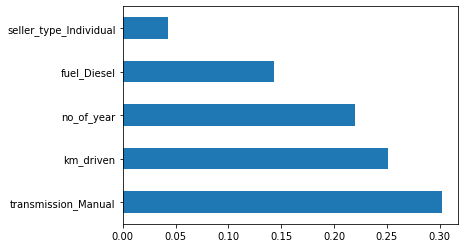

In [0]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [0]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 0.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time= 1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time= 1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time= 1.6s
[CV] END 

In [0]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
-112242709044.21648

In [0]:
# cleaned_username='Vanquishers'

In [0]:
cleaned_username='test'

In [0]:
# from mlflow.tracking.client import MlflowClient

# client = MlflowClient()

# try:
#     client.delete_registered_model(name="feature_store_car_Vanquishers")
      
# except:
#     None

In [0]:
from mlflow.tracking.client import MlflowClient

client = MlflowClient()

try:
    client.delete_registered_model(f"feature_store_car_{cleaned_username}") # Deleting model if already created
except:
    None

In [0]:
rf_random.best_params_

Out[41]: {'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [0]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mlflow.models.signature import infer_signature

rf = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'], min_samples_split=rf_random.best_params_['min_samples_split'], min_samples_leaf=rf_random.best_params_['min_samples_leaf'], max_features=rf_random.best_params_['min_samples_leaf'], max_depth=rf_random.best_params_['max_depth'])
rf.fit(X_train, y_train)

input_example = X_train.head(3)
signature = infer_signature(X_train, pd.DataFrame(y_train))

with mlflow.start_run(run_name="feature_store_car_test") as run:
    mlflow.sklearn.log_model(rf, "model", input_example=input_example, signature=signature)
    mlflow.log_metric("mse", mean_squared_error(y_test, rf.predict(X_test)))
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    run_id = run.info.run_id

/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)
/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 outputs = _infer_schema(model_output) if model_output is not None else None

In [0]:
# # Disable model autologging and instead log explicitly via the FeatureStore
# mlflow.sklearn.autolog(log_models=False)

# def train_model(X_train, X_test, y_train, y_test, training_set, fs):
#     ## fit and log model
#     with mlflow.start_run(run_name='feature_store_car_Vanquishers') as run:

#         rf = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'], min_samples_split=rf_random.best_params_['min_samples_split'], min_samples_leaf=rf_random.best_params_['min_samples_leaf'], max_features=rf_random.best_params_['min_samples_leaf'], max_depth=rf_random.best_params_['max_depth'])
#         rf.fit(X_train, y_train)
#         y_pred = rf.predict(X_test)

#         mlflow.log_metric("test_mse", mean_squared_error(y_test, y_pred))
#         mlflow.log_metric("test_r2_score", r2_score(y_test, y_pred))

#         fs.log_model(
#             model=rf,
#             artifact_path="feature-store-model",
#             flavor=mlflow.sklearn,
#             training_set=training_set,
#             registered_model_name=f"feature_store_car_{cleaned_username}",
#             input_example=X_train[:5],
#             signature=infer_signature(X_train, y_train)
#         )

# train_model(X_train, X_test, y_train, y_test, training_set, fs)

2022/08/14 17:54:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/databricks/python/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer

In [0]:

#         registered_model_name=f"feature_store_car_{cleaned_username}",

In [0]:
# # Disable model autologging and instead log explicitly via the FeatureStore
# mlflow.sklearn.autolog(log_models=False)

# with mlflow.start_run(run_name='feature_store_car_test') as run:

#     rf = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'], min_samples_split=rf_random.best_params_['min_samples_split'], min_samples_leaf=rf_random.best_params_['min_samples_leaf'], max_features=rf_random.best_params_['min_samples_leaf'], max_depth=rf_random.best_params_['max_depth'])
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)

#     mlflow.log_metric("test_mse", mean_squared_error(y_test, y_pred))
#     mlflow.log_metric("test_r2_score", r2_score(y_test, y_pred))

#     fs.log_model(
#         model=rf,
#         artifact_path="feature-store-test",
#         flavor=mlflow.sklearn,
#         training_set=training_set,
#         registered_model_name=f"feature_store_car_{cleaned_username}",
#         input_example=X_train[:5],
#         signature=infer_signature(X_train, y_train)
#     )

/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)
/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 outputs = _infer_schema(model_output) if model_output is not None else None
Successfully registered model 'feature_store_car_test'.
2022/08/16 10:57:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: feature_store_car_test, version 1
Created version '1' of model 'feature_store_car_test'.

In [0]:
# # Disable model autologging and instead log explicitly via the FeatureStore
# mlflow.sklearn.autolog(log_models=False)

# with mlflow.start_run(run_name='feature_store_car_Vanquishers') as run:

#     rf = RandomForestRegressor(n_estimators=rf_random.best_params_['n_estimators'], min_samples_split=rf_random.best_params_['min_samples_split'], min_samples_leaf=rf_random.best_params_['min_samples_leaf'], max_features=rf_random.best_params_['min_samples_leaf'], max_depth=rf_random.best_params_['max_depth'])
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)

#     mlflow.log_metric("test_mse", mean_squared_error(y_test, y_pred))
#     mlflow.log_metric("test_r2_score", r2_score(y_test, y_pred))

#     fs.log_model(
#         model=rf,
#         artifact_path="feature-store-model",
#         flavor=mlflow.sklearn,
#         training_set=training_set,
#         input_example=X_train[:5],
#         signature=infer_signature(X_train, y_train)
#     )

/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)
/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 outputs = _infer_schema(model_output) if model_output is not None else None

In [0]:
# last run_id=89e8e8f553b7430a859c2f3783da27a6

In [0]:
run.info.run_id

Out[50]: 'c25b1cf003f34bc8aa2b5ff1b2e1e146'

In [0]:
# model_name = f"feature_store_car_test"
# model_uri = f"runs:/{run.info.run_id}/feature-store-test"


In [0]:
model_name = f"feature_store_car_test"
model_name

Out[52]: 'feature_store_car_test'

In [0]:
# model_uri = f"runs:/{run.info.run_id}/feature-store-test"


In [0]:
model_uri = f"runs:/{run.info.run_id}/model"


In [0]:
model_uri

Out[54]: 'runs:/c25b1cf003f34bc8aa2b5ff1b2e1e146/model'

In [0]:
model_details = mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'feature_store_car_test' already exists. Creating a new version of this model...
2022/08/16 11:49:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: feature_store_car_test, version 2
Created version '2' of model 'feature_store_car_test'.

In [0]:
from mlflow.tracking.client import MlflowClient

client = MlflowClient()
model_version_details = client.get_model_version(name=model_name, version=2)

model_version_details.status

Out[57]: 'READY'

In [0]:
client.transition_model_version_stage(
    name=model_details.name,
    version=model_details.version,
    stage="Staging"
)

Out[60]: <ModelVersion: creation_timestamp=1660650552122, current_stage='Staging', description='', last_updated_timestamp=1660650736270, name='feature_store_car_test', run_id='c25b1cf003f34bc8aa2b5ff1b2e1e146', run_link='', source='dbfs:/databricks/mlflow-tracking/148458866864737/c25b1cf003f34bc8aa2b5ff1b2e1e146/artifacts/model', status='READY', status_message='', tags={}, user_id='2949754704192057', version='2'>

In [0]:

client.transition_model_version_stage(
    name=model_details.name,
    version=model_details.version,
    stage="Production"
)

Out[63]: <ModelVersion: creation_timestamp=1660650552122, current_stage='Production', description='', last_updated_timestamp=1660650786929, name='feature_store_car_test', run_id='c25b1cf003f34bc8aa2b5ff1b2e1e146', run_link='', source='dbfs:/databricks/mlflow-tracking/148458866864737/c25b1cf003f34bc8aa2b5ff1b2e1e146/artifacts/model', status='READY', status_message='', tags={}, user_id='2949754704192057', version='2'>

In [0]:
model_version_details = client.get_model_version(
  name=model_details.name,
  version=model_details.version,
)
print(f"The current model stage is: '{model_version_details.current_stage}'")

The current model stage is: 'Production'

In [0]:
import mlflow.pyfunc

model_version_uri = f"models:/{model_name}/1"

print(f"Loading registered model version from URI: '{model_version_uri}'")
model_version_1 = mlflow.pyfunc.load_model(model_version_uri)

Loading registered model version from URI: 'models:/feature_store_car_test/1'

--------------------------------------------------------------------------- 
 MlflowException Traceback (most recent call last)
 <command-148458866864877> in <module> 
 4 
 5 print ( f"Loading registered model version from URI: '{model_version_uri}'" ) 
 ----> 6 model_version_1 = mlflow . pyfunc . load_model ( model_version_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/pyfunc/__init__.py in load_model (model_uri, suppress_warnings, dst_path) 
 689 path will be created . 
 690 """
 --> 691 local_path = _download_artifact_from_uri ( artifact_uri = model_uri , output_path = dst_path ) 
 692 
 693 _warn_dependency_requirement_mismatches ( local_path ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/tracking/artifact_utils.py in _download_artifact_from_uri (artifact_uri, output_path) 
 93 root_uri = prefix + urllib . parse . urlunparse ( parsed_uri ) 
 94 
 ---> 95 return get_artifact_repository(artifact_uri=root_uri).download_artifacts(
 96 artifact_path = artifact_path , dst_path = output_path
 97 )

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/models_artifact_repo.py in download_artifacts (self, artifact_path, dst_path) 
 109 : return : Absolute path of the local filesystem location containing the desired artifacts . 
 110 """
 --> 111 return self . repo . download_artifacts ( artifact_path , dst_path ) 
 112 
 113 def _download_file ( self , remote_file_path , local_path ) : 

 /databricks/python/lib/python3.8/site-packages/mlflow/store/artifact/artifact_repo.py in download_artifacts (self, artifact_path, dst_path) 
 263 
 264 if len ( failed_downloads ) > 0 : 
 --> 265 raise MlflowException(
 266 message=(
 267 "The following failures occurred while downloading one or more" 

 MlflowException : The following failures occurred while downloading one or more artifacts from models:/feature_store_car_test/1: {'': 'MlflowException(MlflowException("API request failed with exception Invalid URL \'None\': No schema supplied. Perhaps you meant http://None?"))'}

In [0]:
# model_uri = f"runs:/{run.info.run_id}/feature-store-model"

# model_details = mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'feature_store_car_Vanquishers' already exists. Creating a new version of this model...
2022/08/16 05:50:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: feature_store_car_Vanquishers, version 2
Created version '2' of model 'feature_store_car_Vanquishers'.

In [0]:
from mlflow.tracking.client import MlflowClient

client = MlflowClient()
model_version_details = client.get_model_version(name=model_name, version=1)

model_version_details.status

Out[43]: 'READY'

In [0]:
model_details.name

Out[44]: 'feature_store_car_Vanquishers'

In [0]:
client.update_registered_model(
    name=model_details.name,
    description="This model forecasts car prices based on various listing inputs."
)

Out[45]: <RegisteredModel: creation_timestamp=1660649719577, description='This model forecasts car prices based on various listing inputs.', last_updated_timestamp=1660649740235, latest_versions=[], name='feature_store_car_Vanquishers', tags={}>

In [0]:
client.update_model_version(
    name=model_details.name,
    version=model_details.version,
    description="This model version was built using sklearn."
)

Out[46]: <ModelVersion: creation_timestamp=1660649719804, current_stage='None', description='This model version was built using sklearn.', last_updated_timestamp=1660649741770, name='feature_store_car_Vanquishers', run_id='89e8e8f553b7430a859c2f3783da27a6', run_link='', source='dbfs:/databricks/mlflow-tracking/148458866864605/89e8e8f553b7430a859c2f3783da27a6/artifacts/feature-store-model', status='READY', status_message='', tags={}, user_id='2949754704192057', version='1'>

In [0]:
client.transition_model_version_stage(
    name=model_details.name,
    version=model_details.version,
    stage="Staging"
)

Out[47]: <ModelVersion: creation_timestamp=1660649719804, current_stage='Staging', description='This model version was built using sklearn.', last_updated_timestamp=1660649745663, name='feature_store_car_Vanquishers', run_id='89e8e8f553b7430a859c2f3783da27a6', run_link='', source='dbfs:/databricks/mlflow-tracking/148458866864605/89e8e8f553b7430a859c2f3783da27a6/artifacts/feature-store-model', status='READY', status_message='', tags={}, user_id='2949754704192057', version='1'>

In [0]:
# client.transition_model_version_stage(
#     name=model_details.name,
#     version=model_details.version,
#     stage="Production"
# )

In [0]:
# model_version_details = client.get_model_version(
#   name=model_details.name,
#   version=model_details.version,
# )
# print(f"The current model stage is: '{model_version_details.current_stage}'")

In [0]:
import databricks.feature_store.mlflow_model

In [0]:
model_name

Out[48]: 'feature_store_car_Vanquishers'

In [0]:
# model_name=f"feature_store_car_Vanquishers"

In [0]:
import mlflow.sklearn

In [0]:
# model_version_uri = f"models:/{model_name}/1"

# print(f"Loading registered model version from URI: '{model_version_uri}'")
# model_version_1 = mlflow.sklearn.load_model(model_version_uri)

Loading registered model version from URI: 'models:/feature_store_car_test/1'

--------------------------------------------------------------------------- 
 MlflowException Traceback (most recent call last)
 <command-148458866864584> in <module> 
 2 
 3 print ( f"Loading registered model version from URI: '{model_version_uri}'" ) 
 ----> 4 model_version_1 = mlflow . sklearn . load_model ( model_version_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/sklearn/__init__.py in load_model (model_uri, dst_path) 
 547 """
 548 local_model_path = _download_artifact_from_uri ( artifact_uri = model_uri , output_path = dst_path ) 
 --> 549 flavor_conf = _get_flavor_configuration ( model_path = local_model_path , flavor_name = FLAVOR_NAME ) 
 550 sklearn_model_artifacts_path = os . path . join ( local_model_path , flavor_conf [ "pickled_model" ] ) 
 551 serialization_format = flavor_conf . get ( "serialization_format" , SERIALIZATION_FORMAT_PICKLE ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/utils/model_utils.py in _get_flavor_configuration (model_path, flavor_name) 
 31 model_conf = Model . load ( model_configuration_path ) 
 32 if flavor_name not in model_conf . flavors : 
 ---> 33 raise MlflowException(
 34 'Model does not have the "{flavor_name}" flavor' . format ( flavor_name = flavor_name ) , 
 35 RESOURCE_DOES_NOT_EXIST , 

 MlflowException : Model does not have the "sklearn" flavor

In [0]:
# model_uri = f"runs:/{run.info.run_id}/feature-store-model"
# print(f"Loading registered model version from URI: '{model_version_uri}'")
# model_version_1 = mlflow.sklearn.load_model(model_version_uri)

Loading registered model version from URI: 'models:/feature_store_car_Vanquishers/1'

--------------------------------------------------------------------------- 
 MlflowException Traceback (most recent call last)
 <command-148458866864572> in <module> 
 1 model_uri = f"runs:/{run.info.run_id}/feature-store-model" 
 2 print ( f"Loading registered model version from URI: '{model_version_uri}'" ) 
 ----> 3 model_version_1 = mlflow . sklearn . load_model ( model_version_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/sklearn/__init__.py in load_model (model_uri, dst_path) 
 547 """
 548 local_model_path = _download_artifact_from_uri ( artifact_uri = model_uri , output_path = dst_path ) 
 --> 549 flavor_conf = _get_flavor_configuration ( model_path = local_model_path , flavor_name = FLAVOR_NAME ) 
 550 sklearn_model_artifacts_path = os . path . join ( local_model_path , flavor_conf [ "pickled_model" ] ) 
 551 serialization_format = flavor_conf . get ( "serialization_format" , SERIALIZATION_FORMAT_PICKLE ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/utils/model_utils.py in _get_flavor_configuration (model_path, flavor_name) 
 31 model_conf = Model . load ( model_configuration_path ) 
 32 if flavor_name not in model_conf . flavors : 
 ---> 33 raise MlflowException(
 34 'Model does not have the "{flavor_name}" flavor' . format ( flavor_name = flavor_name ) , 
 35 RESOURCE_DOES_NOT_EXIST , 

 MlflowException : Model does not have the "sklearn" flavor

In [0]:
model_name='feature_store_car_Vanquishers'

In [0]:
import mlflow.pyfunc

model_version_uri = f"models:/{model_name}/1"

print(f"Loading registered model version from URI: '{model_version_uri}'")
model_version_1 = mlflow.pyfunc.load_model(model_version_uri)

Loading registered model version from URI: 'models:/feature_store_car_Vanquishers/1'
2022/08/16 11:36:21 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - databricks-feature-lookup (current: uninstalled, required: databricks-feature-lookup==0.*)

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-148458866864698> in <module> 
 4 
 5 print ( f"Loading registered model version from URI: '{model_version_uri}'" ) 
 ----> 6 model_version_1 = mlflow . pyfunc . load_model ( model_version_uri ) 

 /databricks/python/lib/python3.8/site-packages/mlflow/pyfunc/__init__.py in load_model (model_uri, suppress_warnings, dst_path) 
 708 mlflow . pyfunc . utils . _add_code_to_system_path ( code_path = code_path ) 
 709 data_path = os . path . join ( local_path , conf [ DATA ] ) if ( DATA in conf ) else local_path
 --> 710 model_impl = importlib . import_module ( conf [ MAIN ] ) . _load_pyfunc ( data_path ) 
 711 return PyFuncModel ( model_meta = model_meta , model_impl = model_impl ) 
 712 

 /usr/lib/python3.8/importlib/__init__.py in import_module (name, package) 
 125 break 
 126 level += 1 
 --> 127 return _bootstrap . _gcd_import ( name [ level : ] , package , level ) 
 128 
 129 

 /usr/lib/python3.8/importlib/_bootstrap.py in _gcd_import (name, package, level) 

 /usr/lib/python3.8/importlib/_bootstrap.py in _find_and_load (name, import_) 

 /usr/lib/python3.8/importlib/_bootstrap.py in _find_and_load_unlocked (name, import_) 

 ModuleNotFoundError : No module named 'databricks.feature_store.mlflow_model'

In [0]:
model_version_1.predict(X_test)

In [0]:
## For sake of simplicity, we will just predict on the same inference_data_df
batch_input_df = inference_data_df.drop("selling_price") # Exclude true label
predictions_df = fs.score_batch(f"models:/feature_store_airbnb_{cleaned_username}/1", 
                                  batch_input_df, result_type="double")
display(predictions_df)

In [0]:
## select numeric features and aggregate the review scores
review_columns = ["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", 
                 "review_scores_communication", "review_scores_location", "review_scores_value"]
@feature_table
def select_numeric_features(data):
    result = (data.select(["index"] + numeric_cols)
              .withColumn("average_review_score", expr("+".join(review_columns)) / lit(len(review_columns)))
              .drop(*review_columns)
             )
    return result

condensed_review_df = select_numeric_features(airbnb_df)
display(condensed_review_df)

In [0]:
fs.write_table(
    name=table_name,
    df=condensed_review_df,
    mode="overwrite"
)

In [0]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="selling_price", maxBins=40)

In [0]:
mlflow.autolog()

rf = RandomForestRegressor(random_state=42)
rf_model = rf.fit(X_train, y_train)

In [0]:
from hyperopt import fmin, tpe, hp, SparkTrials

# Define objective function
def objective(params):
    model = RandomForestRegressor(n_estimators=int(params["n_estimators"]), 
                                  max_depth=int(params["max_depth"]), 
                                  min_samples_leaf=int(params["min_samples_leaf"]),
                                  min_samples_split=int(params["min_samples_split"]))
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    score = mean_squared_error(pred, y_train)

    # Hyperopt minimizes score, here we minimize mse. 
    return score

In [0]:
from hyperopt import SparkTrials

# Define search space
search_space = {"n_estimators": hp.quniform("n_estimators", 100, 500, 5),
                "max_depth": hp.quniform("max_depth", 5, 20, 1),
                "min_samples_leaf": hp.quniform("min_samples_leaf", 1, 5, 1),
                "min_samples_split": hp.quniform("min_samples_split", 2, 6, 1)}

# Set parallelism (should be order of magnitude smaller than max_evals)
spark_trials = SparkTrials(parallelism=2)

with mlflow.start_run(run_name="Hyperopt"):
    argmin = fmin(fn=objective,
                  space=search_space,
                  algo=tpe.suggest,
                  max_evals=16,
                  trials=spark_trials)

In [0]:
import matplotlib.pyplot as plt

with mlflow.start_run(run_name="Feature Importance Scores"):
    # Generate and log SHAP plot for first 5 records
    mlflow.shap.log_explanation(rf.predict, X_train[:5])

    # Generate feature importance plot
    feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
    fig, ax = plt.subplots()
    feature_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")

    # Log figure
    mlflow.log_figure(fig, "feature_importance_rf.png")

In [0]:
from pyspark.ml import Pipeline

stages = [string_indexer, ohe_encoder, vec_assembler, rf]
pipeline = Pipeline(stages=stages)

In [0]:
print(rf.explainParams())

bootstrap: Whether bootstrap samples are used when building trees. (default: True)
cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto' (default: auto)
featuresCol: features column name. (default: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: variance (default: variance)
labelCol: label column name. (default: label, current: selling_price)
leafCol: Leaf indices column name. Predicted leaf index of each instance in each tree by preorder. (default: )
maxBins: Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature. (default: 32, current: 40)
maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30]. (default: 5)
maxMemoryInMB: Maximum memory in MB allocated to histogram aggregation. If too small, then 1 node will be split per iteration, and its aggregates may exceed this size. (default: 256)
minInfoGain: Minimum information gain for a split to be considered at a tree node. (default: 0.0)
minInstancesPerNode: Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1. (default: 1)
minWeightFractionPerNode: Minimum fraction of the weighted sample count that each child must have after split. If a split causes the fraction of the total weight in the left or right child to be less than minWeightFractionPerNode, the split will be discarded as invalid. Should be in interval [0.0, 0.5). (default: 0.0)
numTrees: Number of trees to train (>= 1). (default: 20)
predictionCol: prediction column name. (default: prediction)
seed: random seed. (default: 2502083311556356884)
subsamplingRate: Fraction of the training data used for learning each decision tree, in range (0, 1]. (default: 1.0)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)

In [0]:
from pyspark.ml.tuning import ParamGridBuilder

param_grid = (ParamGridBuilder()
              .addGrid(rf.maxDepth, [2, 5])
              .addGrid(rf.numTrees, [5, 10])
              .build())

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator

evaluator = RegressionEvaluator(labelCol="selling_price", predictionCol="prediction")

In [0]:
cv = CrossValidator(estimator=pipeline, evaluator=evaluator, estimatorParamMaps=param_grid, 
                    numFolds=3, seed=42)

In [0]:
cv_model = cv.fit(train_df)

In [0]:
cv = CrossValidator(estimator=rf, evaluator=evaluator, estimatorParamMaps=param_grid, 
                    numFolds=3, parallelism=4, seed=42)

stages_with_cv = [transform_df,string_indexer, vec_assembler, cv]
pipeline = Pipeline(stages=stages_with_cv)

pipeline_model = pipeline.fit(train_df)

--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-828943566396905> in <module> 
 5 pipeline = Pipeline ( stages = stages_with_cv ) 
 6 
 ----> 7 pipeline_model = pipeline . fit ( train_df ) 

 /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method (self, *args, **kwargs) 
 28 call_succeeded = False 
 29 try : 
 ---> 30 result = original_method ( self , * args , ** kwargs ) 
 31 call_succeeded = True 
 32 return result

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 159 return self . copy ( params ) . _fit ( dataset ) 
 160 else : 
 --> 161 return self . _fit ( dataset ) 
 162 else : 
 163 raise TypeError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/pipeline.py in _fit (self, dataset) 
 110 if isinstance ( stage , Transformer ) : 
 111 transformers . append ( stage ) 
 --> 112 dataset = stage . transform ( dataset ) 
 113 else : # must be an Estimator 
 114 model = stage . fit ( dataset ) 

 /databricks/spark/python/pyspark/ml/base.py in transform (self, dataset, params) 
 215 return self . copy ( params ) . _transform ( dataset ) 
 216 else : 
 --> 217 return self . _transform ( dataset ) 
 218 else : 
 219 raise TypeError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _transform (self, dataset) 
 348 def _transform ( self , dataset ) : 
 349 self . _transfer_params_to_java ( ) 
 --> 350 return DataFrame ( self . _java_obj . transform ( dataset . _jdf ) , dataset . sql_ctx ) 
 351 
 352 

 /databricks/spark/python/lib/py4j-0.10.9.1-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide where the exception came from that shows a non-Pythonic 
 122 # JVM exception message. 
 --> 123 raise converted from None 
 124 else : 
 125 raise 

 IllegalArgumentException : nameOHE does not exist. Available: name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, nameIndex, fuelIndex, seller_typeIndex, transmissionIndex, ownerIndex

In [0]:
list(zip(cv_model.getEstimatorParamMaps(), cv_model.avgMetrics))
pred_df = pipeline_model.transform(test_df)
rmse = evaluator.evaluate(pred_df)
r2 = evaluator.setMetricName("r2").evaluate(pred_df)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

Out[22]: name 0
year 0
selling_price 0
km_driven 0
fuel 0
seller_type 0
transmission 0
owner 0
dtype: int64